# Option-Pricing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

%matplotlib inline

<a id='sec1'></a>
# Model Description

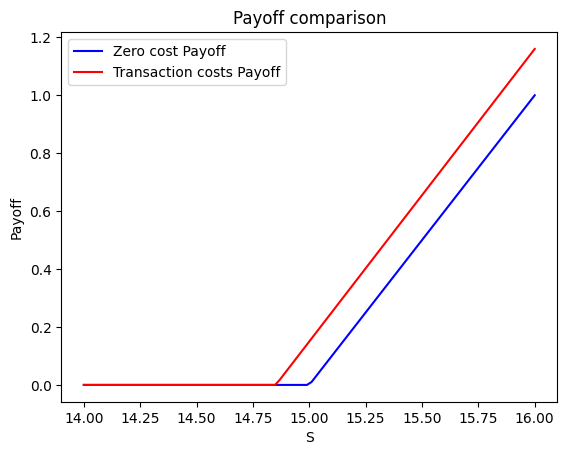

In [2]:
S = np.linspace(14, 16, 100) # stock price
K = 15  # strike
cost_b = 0.01  # transaction cost

plt.plot(S, np.maximum(S - K, 0), color="blue", label="Zero cost Payoff")
plt.plot(S, np.maximum(S * (1 + cost_b) - K, 0), color="red", label="Transaction costs Payoff")
plt.xlabel("S")
plt.ylabel("Payoff")
plt.title("Payoff comparison")
plt.legend(loc="upper left")
plt.show()

<a id='sec4'></a>
# Numerical Solution

### Binomial Tree

In [3]:
N = 6 # number of steps 
dt = 1 / N # time step
S0 = 15 # initial stock price
x0 = np.log(S0) # initial log stock price
mu = 0.1 # drift
sig = 0.25 # volatility
h_x = sig * np.sqrt(dt) # step size for log stock price

for n in range(N): # loop over time steps
    x = np.array([x0 + (mu - 0.5 * sig**2) * dt * n + (2 * i - n) * h_x for i in range(n + 1)])
    print(x)

[2.7080502]
[2.61744646 2.82157061]
[2.52684272 2.73096687 2.93509101]
[2.43623898 2.64036313 2.84448727 3.04861142]
[2.34563524 2.54975939 2.75388353 2.95800768 3.16213182]
[2.2550315  2.45915565 2.6632798  2.86740394 3.07152809 3.27565223]


# Numerical computations

In [4]:
from FMNM.Parameters import Option_param
from FMNM.Processes import Diffusion_process
from FMNM.TC_pricer import TC_pricer
from FMNM.BS_pricer import BS_pricer

# Creates the object with the parameters of the option
opt_param = Option_param(S0=15, K=15, T=1, exercise="European", payoff="call")

# Creates the object with the parameters of the process
diff_param = Diffusion_process(r=0.1, sig=0.25, mu=0.1)

# Creates the object of the Transaction Costs pricer
TC = TC_pricer(opt_param, diff_param, cost_b=0, cost_s=0, gamma=0.0001)
# Creates the object of the Black-Scholes pricer
BS = BS_pricer(opt_param, diff_param)

We expect that if the transaction costs are **zero**, and the risk aversion coefficient $\gamma \to 0$ (i.e. the investor becomes risk neutral), the price should **converge** to the **Black-Scholes price**

In [5]:
tc = TC.price(N=2000) # price with transaction costs
bs = BS.closed_formula() # price with Black-Scholes formula

print("Zero TC price: ", tc)
print("Black Scholes price:", bs)
print("Difference:", np.abs(tc - bs))

Zero TC price:  2.246375063664713
Black Scholes price: 2.246368616746695
Difference: 6.446918018099268e-06


Let us analyze the the writer and buyer prices, for different initial stock values.

In [6]:
S = list(range(5, 21)) # stock price
price_0 = [] # zero costs
price_w = [] # writer
price_b = [] # buyer

for s in S: # loop over stock prices
    TC.S0 = s
    TC.cost_b = 0
    TC.cost_s = 0
    price_0.append(TC.price(N=400))  # zero costs
    TC.cost_b = 0.05
    TC.cost_s = 0.05
    price_w.append(TC.price(N=400, TYPE="writer"))
    price_b.append(TC.price(N=400, TYPE="buyer"))
TC.cost_b = 0 # set to 0 for future computations
TC.cost_s = 0  # set to 0 for future computations

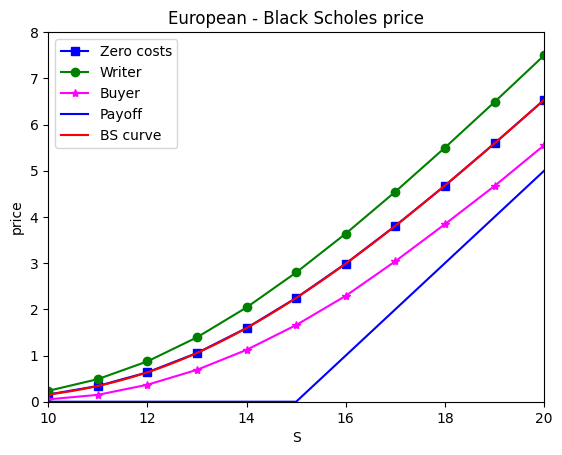

In [7]:
plt.plot(S, price_0, color="blue", marker="s", label="Zero costs")
plt.plot(S, price_w, color="green", marker="o", label="Writer")
plt.plot(S, price_b, color="magenta", marker="*", label="Buyer")
BS.plot(axis=[10, 20, 0, 8])  # plot of the Black Scholes line

### Time complexity

In [ ]:
NUM = 7 # number of steps
price_table = pd.DataFrame(columns=["N", "Price", "Time"]) # table with prices
for j, n in enumerate([50 * 2**i for i in range(NUM)]): # loop over number of steps
    price_table.loc[j] = [n] + list(TC.price(n, Time=True)) # add the price to the table
display(price_table)

Using the computational times we can estimate the exponent $\alpha$ of the polinomial growth $\mathcal{O}(N^\alpha)$. 
For higher values of N, the exponent converges to the expected value of $\alpha=4$.

In [9]:
print("The exponent is: ", np.log2(price_table["Time"][6] / price_table["Time"][5]))

The exponent is:  3.1840732004452104


The coefficient $\gamma$ measure the risk aversion of the investor.

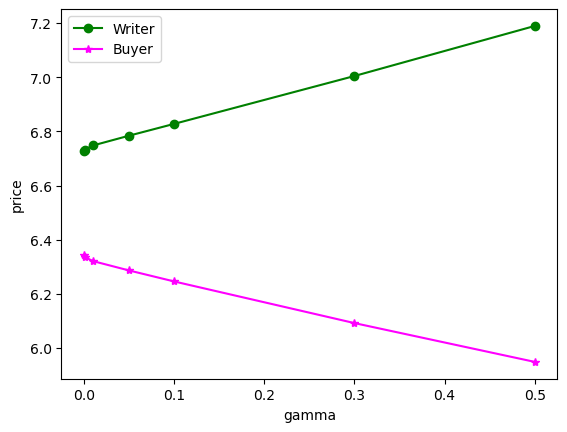

In [10]:
price_ww = [] # writer
price_bb = [] # buyer
gammas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5] # gamma values
TC.cost_b = 0.01 # set to 0.01 for future computations
TC.cost_s = 0.01 # set to 0.01 for future computations

for gamma in gammas: 
    TC.gamma = gamma # set gamma
    price_ww.append(TC.price(N=400, TYPE="writer"))
    price_bb.append(TC.price(N=400, TYPE="buyer"))

plt.plot(gammas, price_ww, color="green", marker="o", label="Writer")
plt.plot(gammas, price_bb, color="magenta", marker="*", label="Buyer")
plt.xlabel("gamma")
plt.ylabel("price")
plt.legend()
plt.show()

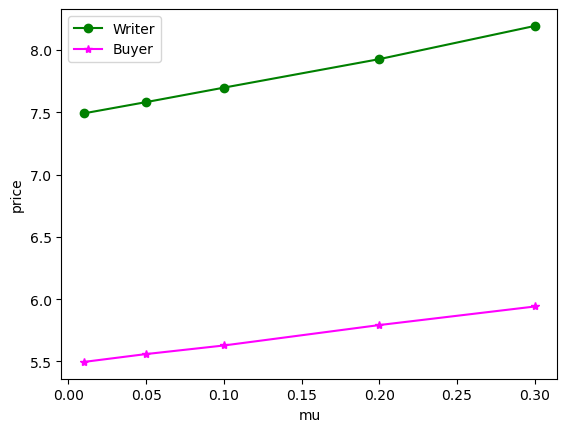

In [11]:
price_mu1 = [] # writer 
price_mu2 = [] # buyer
mus = [0.01, 0.05, 0.1, 0.2, 0.3] # mu values
TC.gamma = 1  # high value of risk aversion
TC.cost_b = 0.01 # set to 0.01 for future computations
TC.cost_s = 0.01 # set to 0.01 for future computations

for mu in mus: 
    TC.mu = mu # set mu
    price_mu1.append(TC.price(N=400, TYPE="writer"))
    price_mu2.append(TC.price(N=400, TYPE="buyer"))

plt.plot(mus, price_mu1, color="green", marker="o", label="Writer")
plt.plot(mus, price_mu2, color="magenta", marker="*", label="Buyer")
plt.xlabel("mu")
plt.ylabel("price")
plt.legend()
plt.show()